# Observations and Insights 

In [1]:
#help(pd.DataFrame.groupby)

## Preparing the Data

In [2]:
#added to make the charts interactive
#%matplotlib notebook 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
lab_results = pd.merge(mouse_metadata,study_results, on="Mouse ID" )

# Display the data table for preview
lab_results.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [5]:
# Checking the number of mice.
#Create a series to hold all the unique Mouse IDs

mouse_ID_list = lab_results["Mouse ID"].unique()

print(f'Before cleaning the data, there are {len(mouse_ID_list)} mice to be evaulated.')


Before cleaning the data, there are 249 mice to be evaulated.


In [6]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#Copy previous dataframe to be modified to the new dataframe with clean data
cleaned_lab_results= lab_results.copy()

#DataFrame to capture the removed duplicated Mouse ID based on the Timepoint
dropped_mouse = pd.DataFrame()

#Counter to traverse through the mouse_ID_list
counter = 0

for items in mouse_ID_list:
    #created a temporary dataframe to hold all the information for each mouse
    temp_df = cleaned_lab_results.loc[(cleaned_lab_results["Mouse ID"]== mouse_ID_list[counter]),:]
    
    #Check if the count of entries for the mouse is the same as there are unique Timepoints for that mouse
    #if not equal, then drop all the rows for that mouse
    
    if len(temp_df["Timepoint"]) != (temp_df["Timepoint"].nunique()):
        
        #Add the mouse to the dropped_mouse dataframe
        dropped_mouse=dropped_mouse.append(temp_df)
        
        #Remove the mouse from the clean dataframe
        cleaned_lab_results= cleaned_lab_results.drop(temp_df.index)
        
    counter +=1 #increase counter to check for the next mouse ID

print(f'After cleaning the data there are now: {len(cleaned_lab_results["Mouse ID"].unique())} mice to be evaluated.')



After cleaning the data there are now: 248 mice to be evaluated.


In [7]:
#Optional: Get all the data for the duplicate mouse ID. 
#Duplicate Mouse ID information was captured with removing the data

print("The following is information on the Mouse ID with duplicate Timepoints:")
dropped_mouse


The following is information on the Mouse ID with duplicate Timepoints:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


# Work Area below

## Summary Statistics

### Using Group By Method

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

* Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
* mean, median, variance, standard deviation, and SEM of the tumor volume. 
* Assemble the resulting series into a single summary dataframe.

In [8]:
#A snapshot view of the cleaned lab results dataframe
cleaned_lab_results.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [9]:
#Grouping of the data based on the name of the regimen

grouped_regimen = cleaned_lab_results.groupby("Drug Regimen") 
grouped_regimen.count().head(2)


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178


In [10]:
#Calculating the Mean of the Regimens
mean_regimen = grouped_regimen["Tumor Volume (mm3)"].mean()
mean_regimen

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Calculating the Median of the Regimens
median_regimen = grouped_regimen["Tumor Volume (mm3)"].median()
median_regimen

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Calculating the Variance of the Regimens
var_regimen= grouped_regimen["Tumor Volume (mm3)"].var()
var_regimen

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Calculating the Standard Deviation of the Regimens
std_regimen=grouped_regimen["Tumor Volume (mm3)"].std()
std_regimen

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Calculating the SEM of the Regimens
sem_regimen= grouped_regimen["Tumor Volume (mm3)"].sem()
sem_regimen

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Below is the combination of the measures of central tendency based on each regimen calculated above
summary_stat_groupby_df = pd.concat({'Mean': mean_regimen,
                             'Median': median_regimen,
                             'Variance': var_regimen,
                             'STD': std_regimen,
                             'SEM': sem_regimen},axis=1)

summary_stat_groupby_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Using Aggregation Method

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
* Using the aggregation method, produce the same summary statistics in a single line

In [16]:
#Using the groupedby DataFrame Object, run the agg() function for the Tumor

agg_regimen = grouped_regimen.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
#Total number of timepoints for all mice based on the drug regimen
#Drug Regimen - xaxis; count of timepoints  = yaxis

grouped_regimen.count().head(3)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178


### Bar Chart using Pandas plot

Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

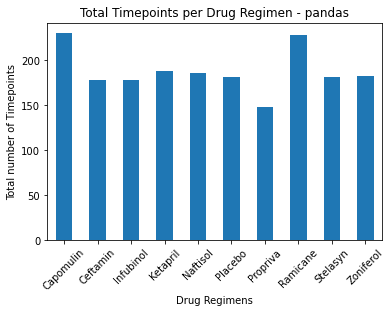

In [18]:
#Setting the data for the axis
y_axis = grouped_regimen["Timepoint"].count()

pandas_bar_chart = y_axis.plot(kind="bar", title = "Total Timepoints per Drug Regimen - pandas", rot =45)
pandas_bar_chart.set_ylabel("Total number of Timepoints")
pandas_bar_chart.set_xlabel("Drug Regimens")

plt.show(pandas_bar_chart)


### Bar Chart using pyplot

Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

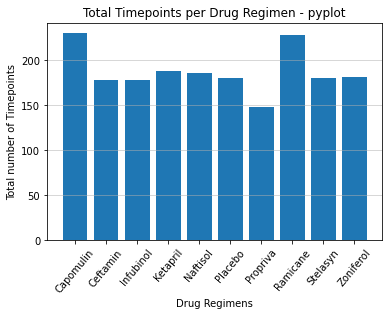

In [19]:
#Setting the data for the axis
y_axis = grouped_regimen["Timepoint"].count()
x_axis = np.arange(len(y_axis)) #x_axis is an array from 0-9

#Converted the groupby dataframe object to data frame so that the index can be captured
x_label = pd.DataFrame(grouped_regimen["Drug Regimen"])[0]


#Update the tickers for the bar chart
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_label,rotation=50)

plt.ylabel("Total number of Timepoints")
plt.xlabel("Drug Regimens")
plt.title("Total Timepoints per Drug Regimen - pyplot")
plt.grid(axis ="y",lw =.5)

plt.bar(x_axis, y_axis,align = "center")
plt.show()

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

grouped_sex = cleaned_lab_results.groupby("Sex") .count()
#grouped_sex.count()
#mice_sex =pd.DataFrame(grouped_sex.count())
#mice_sex

grouped_sex.plot.pie(grouped_sex)


#df = df.groupby(['Age', 'bins']).size().unstack(fill_value=0)
#df.plot.pie(subplots=True,figsize=(8, 3))

TypeError: pie() takes 1 positional argument but 2 were given

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [23]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
